
<a id="overview"></a>

# Predicting Stock Price Movement


## Overview
It's your first day at RedBoulder, the globe's preeminent financial institution. On your first day, you are assigned to design an algorithm to predict the movement of the equity, [Twilio, Inc](https://finance.yahoo.com/quote/TWLO/). You are given two datasets:

1. Price / volume data for the month of August 2019
2. Twitter data for the month of August 2019. This dataset includes every single tweet posted in that month that includes the cashtag `$TWLO`

In this project, you will be tasked with importing, cleaning, visualizing, and analyzing market data for Twilio, Inc. (TWLO). Your goal is to predict how the price is likely to move in short intervals. To do so, you'll be  comparing market data to trends ascertained from sentiment data collected on Twitter.


**Expected Time to complete: 5-10 hours**

## Objectives

This assignment will provide you with a chance to:

- Use `pandas` to read in CSV files.
- Practice core `pandas` functionality such as `merge`, filtering, etc.
- Graph trends to determine insights with `matplotlib`.
- Clean and structure stock price prediction data to forecast demand.


## Problem

Your task is to set up the data and ascertain signals that correlate to stock price movement. You'll be answering questions, such as:

- What is the volatility of our data within 30 minute windows?
- Can we predict price movement within 2 hours with a degree of accuracy better than random chance?

> Hint: This assignment works extensively with financial terminology. If you need a refresher, [click here](https://www.investopedia.com/insights/digging-deeper-bull-and-bear-markets/).

## Structure

This notebook walks through Pythonic data analysis in different stages: 

- **Required:** This section covers classroom topics from recent units. These are _required_. 
- **Advanced:** This section covers upcoming topics. These are _optional_.

Throughout the notebook, you will see clearly labeled sections._You must provide answers to all of the questions in the **Required** section._ Some questions have been further divided up into "Part 1", "Part 2", (etc) in order to break down the steps of sequential logic used in Python programming. Please attempt answers for all parts.

For those of you who wish to work ahead or want to come back later for more practice, the **Advanced** section offers additional prompts that will extend your analysis. This section is optional; you do not need to complete these for submission; however, depending on the discretion of your section instructor, these questions may be completed for bonus points.


## Instructions

1. Open the assignment notebook. 
1. Save a copy of your notebook and retitle it: "yourname_assignment.ipynb"
1. Attempt answers for all **Required questions**. Some questions can be solved in many different ways!
1. Include at least one comment per question explaining your logic or approach. To include a comment in your Python code, use the `#` sign.
1. Make sure to include all work within your Jupyter notebook.
1. Submit answers for the **Required questions** to your instructional team by the due date.
1. Have fun!

## Data

Our dataset includes two CSV files: `twlo.csv` and `tweets.csv`.

- `Twlo.csv` includes price / volume data for the month of August 2019.
- `Tweets.csv` includes Twitter data for the month of August 2019, pulling in every single tweet posted that month which included the tag `$TWLO`.


1. Within `twlo.csv`, you'll see the following columns:

    - date - the date of the stock market data point (by the minute)
    - close - the closing price
    - high - high for the minute
    - low - low for the minute
    - open - opening price
    - volume - trading volume at that minute
    

2. In `tweets.csv`, you'll find:

    - text - the text of all tweets containing the tag `$TWLO`
    - `tweet_unique_id` - twittter's unique id for the tweet
    - `date_tweeted` - the date that tweet was posted
    - `author_handle` - handle for the author
    - `author_id` - unique id for the author
    - `author_verified` - boolean, whether or not the author is "Twitter verified"
    - `num_followers` - How many followers the author has
    - `num_following` - How many people the author follows
  

---
### Setting up our Environment

In [1]:
# Import our libraries for data manipulation and plotting:

import pandas as pd
from matplotlib import style
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Chose to replace the generic 'data' object name with twlo for a more descriptive title
twlo = pd.read_csv('data/twlo.csv')

------------------

# REQUIRED / GRADED
> **Required:** This section covers classroom topics from class and is _required_. 

Begin your analysis by analyzing the data with Pandas. 

Ready, set, go!


---

## Question 1

Change the index to be the `date` column [and use `tz_convert`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.tz_convert.html) to convert the dates to Eastern timezone (they are currently in UTC).

In [3]:
# Now you try!
# Enter your solution for Q1
#  tz_convert function uses an Index. First store the data['date'] into object date as DatetimeIndex
date = pd.DatetimeIndex(twlo['date'])
#  Use tz_convert to change it from UTC time zone to US/Eastern time zone 
date = date.tz_convert('US/Eastern')
#  Enter the EST date into the data['date'] column
twlo['date'] = date
#  Check to see data's datatypes are correct
print(twlo.dtypes)
#  Check the head rows of data
print(twlo.head())

date      datetime64[ns, US/Eastern]
close                        float64
high                         float64
low                          float64
open                         float64
volume                       float64
dtype: object
                       date       close        high         low        open  \
0 2019-08-01 09:30:00-04:00  139.990005  139.990005  139.990005  139.990005   
1 2019-08-01 09:31:00-04:00  138.970001  141.500000  138.970001  139.704300   
2 2019-08-01 09:32:00-04:00  139.360001  140.000305  138.710007  140.000305   
3 2019-08-01 09:33:00-04:00  140.809998  140.839996  138.759995  139.500000   
4 2019-08-01 09:34:00-04:00  139.999893  140.820007  139.703506  140.800003   

     volume  
0  196282.0  
1   75698.0  
2   90875.0  
3   76913.0  
4   58998.0  


---

## Question 2

Use pandas plot to plot the closing price as a line graph over the entire month of August. Include a title for the graph.

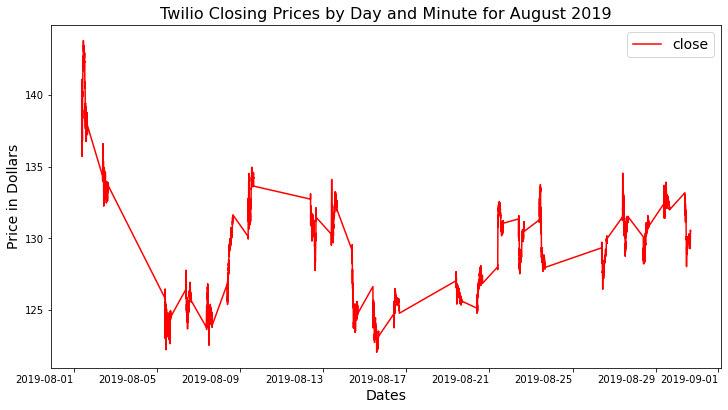

In [4]:
# Now you try!
# Enter your solution for Q2

# Plot the data with the following parameters
twlo.plot(kind = 'line', x='date', y= 'close', figsize = (12,7), color = 'red', rot = 'horizontal')

# Add title and labels
plt.title('Twilio Closing Prices by Day and Minute for August 2019', fontsize = 16)
plt.xlabel('Dates', fontsize = 14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.legend(fontsize = 14, loc = 'best')

#### Chart above has closing prices for every minute of the active trading day.
#### Alternatively, taking only the closing price at the last minute of the day may create a cleaner picture.

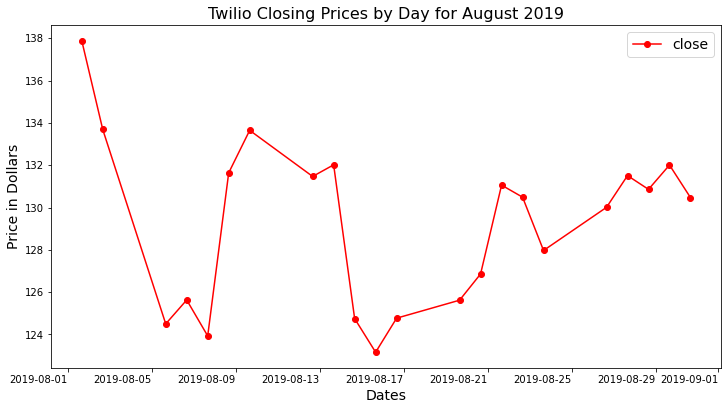

In [5]:
# Copy twlo to new object dataframe twloDT
twloDT = twlo.copy()
# Add separate columns for date and time 
twloDT['Date'] = twloDT['date'].dt.date
twloDT['Time'] = twloDT['date'].dt.time
# Convert Time dtype to string
twloDT['Time'] = twloDT['Time'].astype(str)
# Keep only the last minute of each active trading day
twloEndDay = twloDT.loc[(twloDT['Time'] == '15:59:00' )]

# Plot the data with the following parameters
twloEndDay.plot(kind = 'line', x='date', y= 'close', figsize = (12,7), color = 'red', rot = 'horizontal',
               marker = 'o')

# Add title and labels
plt.title('Twilio Closing Prices by Day for August 2019', fontsize = 16)
plt.xlabel('Dates', fontsize = 14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.legend(fontsize = 14, loc = 'best')

---

## Question 3

Use Matplotlib (not built in pandas plotting) to plot two graphs on top of one another:

- **Part 1**. The top graph should be the closing price plotted over the entire month (same as the last question)
- **Part 2**. The bottom graph should be the volume as a bar chart

> Hint: If you want to customize your plots, [check out the documentation for `style.use`](https://matplotlib.org/3.1.1/api/style_api.html?highlight=style%20use#matplotlib.style.use). [Click here for further inspiration](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html).

##### NOTE: Took my computer 15 seconds to generate close chart and another 15-25 seconds to generate volume chart  or a total 30-40 seconds to generate both charts below

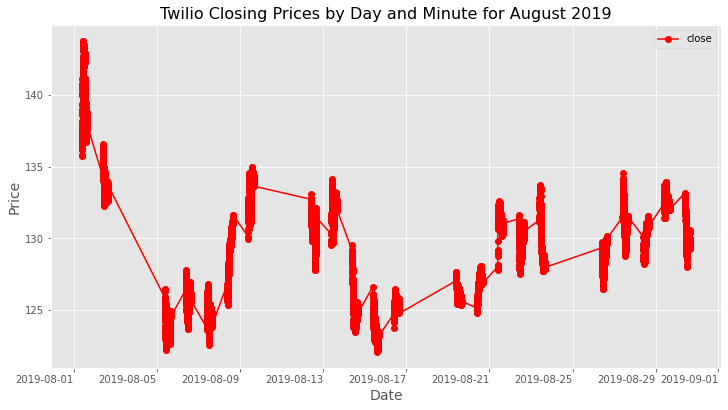

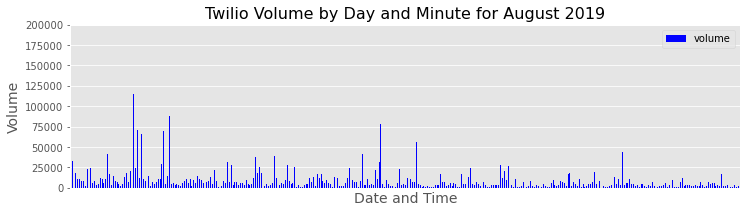

In [6]:
# Now you try!
# Enter your solution for Q3, Parts 1 and 2
style.use('ggplot')

# Plot closing prices with the following parameters
close = twlo.plot(kind = 'line',x ='date', y = 'close', figsize = (12,7), color = 'red', rot = 'horizontal',
               marker = 'o')
plt.ylabel('Price', fontsize = 14)
plt.xlabel('Date', fontsize = 14)
plt.title("Twilio Closing Prices by Day and Minute for August 2019", fontsize = 16)

# Plot volume with the following parameters

volume = twlo.plot(kind ='bar', x='date', y ='volume', figsize = (12,3), color = 'blue', rot = 'horizontal')
plt.ylabel('Volume', fontsize = 14)
plt.xlabel('Date and Time', fontsize = 14)
# Chose to exclude volume xtick labels since they were illegible. close xticks provides a reference for volume
plt.xticks([])
plt.ylim(0,200000)
plt.title('Twilio Volume by Day and Minute for August 2019', fontsize =16)

plt.show()


---

## Question 4

Use pandas' [rolling method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) to calculate the rolling standard deviation and rolling mean with 30 minute windows for the "close" and "volume" columns.

> Hint: Some cells will be empty because there isn't any data from the last 30 minutes for early trading minutes. This is ok!

In [7]:
# Now you try!
# Enter your solution for Q4

# Create rolling 30 min mean for close.  Drop na's.
close_rolling_30_mean = twlo[['close']].rolling(30).mean().dropna()
# # Inspect first 2 rows
close_rolling_30_mean.head(2)

,close
29,138.407524
30,138.301190


In [8]:
# Create rolling 30 min standard deviation for close.  Drop na's.
close_rolling_30_std = twlo[['close']].rolling(30).std().dropna()
# # Inspect first 2 rows
close_rolling_30_std.head(2)

,close
29,1.757602
30,1.755056


In [9]:
# Create rolling 30 min mean for volume.  Drop na's.
volume_rolling_30_mean = twlo[['volume']].rolling(30).mean().dropna()
# # Inspect first 2 rows
volume_rolling_30_mean.head(2)

,volume
29,61011.466667
30,55693.733333


In [10]:
# Create rolling 30 min standard deviation for volume.  Drop na's.
volume_rolling_30_std = twlo[['volume']].rolling(30).std().dropna()
# # Inspect first 2 rows
volume_rolling_30_std.head(2)

,volume
29,35601.753300
30,25051.129265


---

### Tutorial

The **[Coefficient of Variation](https://en.wikipedia.org/wiki/Coefficient_of_variation)** provides a standardized measure of dispersion that gives some insight into the volatility of day to day trading.

---

## Question 5

Calculate the rolling "Coefficient of Variation" (calculated as the `rolling std / rolling mean`) with a window of 60 minutes for each column.

> Remember, some cells will be empty because there isn't any data from the last 30 minutes for early trading minutes. This is ok!

In [11]:
# Now you try!
# Enter your solution for Q5

# To create rolling "Coefficient of Variation" at 60 minute windows...
# First create rolling 60 min average and standard deviation for close and volume.  Drop "NaN"
close_rolling_60_mean = twlo[['close']].rolling(60).mean().dropna()
close_rolling_60_std = twlo[['close']].rolling(60).std().dropna()
volume_rolling_60_mean = twlo[['volume']].rolling(60).mean().dropna()
volume_rolling_60_std = twlo[['volume']].rolling(60).std().dropna()

# Calculate 60 min "Coefficient of Variation" for close and volume.
close_rolling_60_CoV = close_rolling_60_std/close_rolling_60_mean
volume_rolling_60_CoV = volume_rolling_60_std/volume_rolling_60_mean

# Inspect first 3 rows of ...
close_rolling_60_CoV.head(3)

,close
59,0.010781
60,0.010783
61,0.010968


In [12]:
# Inspect first 3 rows of ...
volume_rolling_60_CoV.head(3)

,volume
59,0.636499
60,0.521801
61,0.524108


---

### Tutorial

In [13]:
# Great, now let's import the twitter data!

tweets = pd.read_csv('data/twlo_tweets.csv')

tweets.head()

,text,tweet_unique_id,author_handle,author_id,author_verified,date_tweeted,num_followers,num_following
0,"RT @HedgeMind: $TWLO's hype growth continues, ...",1156719610433015808,AshwinMaddi,57757815,False,2019-08-01 00:13:40+00:00,191,548
1,"Blog Post: ""Burn It to the Ground""\n\nhttps://...",1156719981083729923,JohnBonini,23892061,False,2019-08-01 00:15:08+00:00,390,688
2,$TWLO Twilio Inc. Class A Commo #LeaderPullBac...,1156721339325177856,stockmktgenius,914214567152160768,False,2019-08-01 00:20:32+00:00,597,58
3,Jeff Lawson (Twilio $TWLO Founder &amp; CEO) i...,1156727135530360834,newmoneyFC,3278201701,False,2019-08-01 00:43:34+00:00,1437,201
4,"RT @EvanKenty: $TWLO Regained all AH drop, sho...",1156727777195958280,j_p_jacques,31173813,False,2019-08-01 00:46:07+00:00,1344,1780


---

## Question 6

Change the index of `tweets` to be the `date_tweeted` column and use [tz_convert](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.tz_convert.html) to convert the dates to Eastern timezone (they are currently all in UTC)

In [14]:
# Now you try!
# Enter your solution for Q6

# Set the date_tweeted as the index in datetime format.
tweets.index = pd.to_datetime(tweets['date_tweeted'])
# Convert the index from UTC to US Eastern time zone.
tweets.index = tweets.index.tz_convert('US/Eastern')
# Delete the date_tweeted column since it is redundant with index.
del tweets['date_tweeted']
# Print the first five rows of tweets to check index correctly formatted.
tweets.head()

,text,tweet_unique_id,author_handle,author_id,author_verified,num_followers,num_following
date_tweeted,,,,,,,
2019-07-31 20:13:40-04:00,"RT @HedgeMind: $TWLO's hype growth continues, ...",1156719610433015808,AshwinMaddi,57757815,False,191,548
2019-07-31 20:15:08-04:00,"Blog Post: ""Burn It to the Ground""\n\nhttps://...",1156719981083729923,JohnBonini,23892061,False,390,688
2019-07-31 20:20:32-04:00,$TWLO Twilio Inc. Class A Commo #LeaderPullBac...,1156721339325177856,stockmktgenius,914214567152160768,False,597,58
2019-07-31 20:43:34-04:00,Jeff Lawson (Twilio $TWLO Founder &amp; CEO) i...,1156727135530360834,newmoneyFC,3278201701,False,1437,201
2019-07-31 20:46:07-04:00,"RT @EvanKenty: $TWLO Regained all AH drop, sho...",1156727777195958280,j_p_jacques,31173813,False,1344,1780


---

## Question 7

- **Part 1**: Show the tweets that contain the word `bull` in it
- **Part 2**: Show a bar chart showing the number of tweets that come out by the hour of the day

> Hint: There should be 24 bars, each bar showing how many tweets came out at that hour over the entire month.

In [15]:
# Now you try!
# Enter your solution for Q7, Part 1
Bull = tweets[(tweets.text.str.contains('bull') | tweets.text.str.contains('Bull'))]
Bull.head(10)

,text,tweet_unique_id,author_handle,author_id,author_verified,num_followers,num_following
date_tweeted,,,,,,,
2019-08-01 01:35:21-04:00,Prepare for the next bullmarket !\n$CNDT $SEND...,1156800566355304449,GrandSuperCycle,74408465,False,1193,1027
2019-08-01 01:59:48-04:00,RT @GrandSuperCycle: Prepare for the next bull...,1156806718522822656,Gambiste1,1136370591517290496,False,1379,2
2019-08-01 10:29:10-04:00,"RT @Stocktwits: Twilio $TWLO has 25,000 total ...",1156934905558753282,AlertTrade,121158213,False,133258,138070
2019-08-01 11:09:31-04:00,$TWLO \n \nBullish engulfing and above ma50 \...,1156945057318080513,MadMraket,19052568,False,1304,149
2019-08-01 18:03:30-04:00,Bullish Option Order Flow Sentiment $shop $msf...,1157049242244063232,ITRADEVOL,3015371680,False,2743,752
2019-08-01 18:57:46-04:00,RT @ITRADEVOL: Bullish Option Order Flow Senti...,1157062898897838081,MC_OptionTrades,818481118483742720,False,1548,4
2019-08-01 18:59:27-04:00,RT @ITRADEVOL: Bullish Option Order Flow Senti...,1157063321222340608,MarketChmln,727519600787750913,False,2387,5
2019-08-02 21:00:31-04:00,RT @bullriders1: $TWLO 133.55 https://t.co/yxF...,1157456174545088513,Gambiste1,1136370591517290496,False,1419,2
2019-08-03 02:26:24-04:00,RT @nobullshitplzok: @jeffcotrupe @zoom_us Yea...,1157538187193069569,Gambiste1,1136370591517290496,False,1418,2


Text(0, 0.5, 'Number of Tweets')

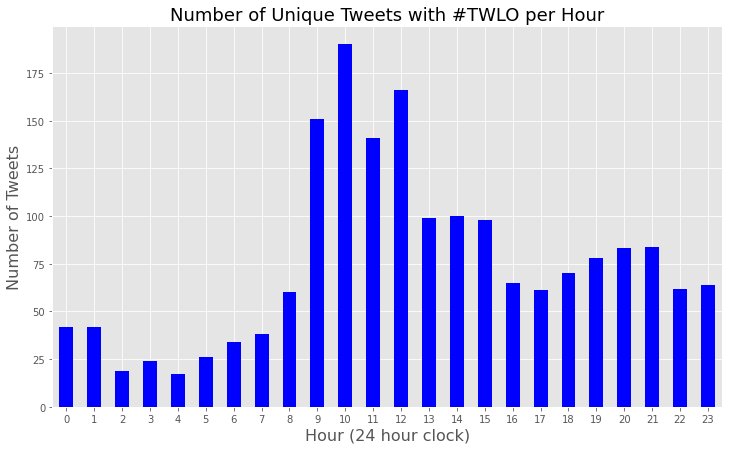

In [16]:
# Now you try!
# Enter your solution for Q7, Part 2

tweets.groupby(tweets.index.hour).count()['tweet_unique_id'].plot(kind='bar', figsize = (12,7), 
                                                                  rot = 'horizontal', color = 'blue')
plt.title("Number of Unique Tweets with #TWLO per Hour", fontsize = 18)
plt.xlabel("Hour (24 hour clock)", fontsize = 16)
plt.ylabel("Number of Tweets", fontsize = 16)


------------------

# ADVANCED 

> **Advanced:** This section covers upcoming topics from future units. These questions are _optional_. 

So far, you've learned to work with Pandas to analyze data... but there's still a lot more to be done!

The following questions are NOT required for submission; however, they will help you expand your analysis. In the next section, we'll deepen our analysis by comparing training and test data and then building a decision tree classifier.

> Hint: If you feel like proceeding, we recommend that you spend some time with the documentation for [ScikitLearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

---

### Tutorial

In [17]:
# Let's add a column called `minute`, which will be the `date_tweeted` column rounded to the nearest minute:

tweets['minute'] = tweets.index.round(freq='1T')
tweets.head(2)

,text,tweet_unique_id,author_handle,author_id,author_verified,num_followers,num_following,minute
date_tweeted,,,,,,,,
2019-07-31 20:13:40-04:00,"RT @HedgeMind: $TWLO's hype growth continues, ...",1156719610433015808,AshwinMaddi,57757815,False,191,548,2019-07-31 20:14:00-04:00
2019-07-31 20:15:08-04:00,"Blog Post: ""Burn It to the Ground""\n\nhttps://...",1156719981083729923,JohnBonini,23892061,False,390,688,2019-07-31 20:15:00-04:00


In [18]:
# Now we'll create a DataFrame that groups the "tweets" DataFrame by the minute, then counts the number of tweets, 
# and sums the number of people (collectively) who were the audience for tweets at that minute!

tweet_count_by_minute = tweets.groupby('minute').agg({'num_followers': 'sum', 'tweet_unique_id': 'count'})

tweet_count_by_minute.head()

,num_followers,tweet_unique_id
minute,,
2019-07-31 20:14:00-04:00,191,1
2019-07-31 20:15:00-04:00,390,1
2019-07-31 20:21:00-04:00,597,1
2019-07-31 20:44:00-04:00,1437,1
2019-07-31 20:46:00-04:00,1344,1


---

## Question 8

- **Part 1** - Merge the `tweet_count_by_minute` DataFrame into our working data using `pandas.merge`, [making sure to fill any missing data with a 0](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

- **Part 2** - Next, [use pandas.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html) to add a new column called `price_change_in_two_hours`, which should return the closing price 120 minutes from the given row.

In [19]:
# Now you try!
# Enter your solution for Q8, Part 1

# To merge the tweet_count_by_minute with twlo data set...
# First rename tweet_count_by_minute index to 'date' for common key to merge.
tweet_count_by_minute.index.names = ['date']
# Create twlotweets by merging twlo with tweet_count_by_minute on date
# Use left join to include all data points in twlo and replace na with 0.
twlotweets = pd.merge(twlo,tweet_count_by_minute, on='date', how ='left').fillna(0)
# Set the date as the index in datetime format.
twlotweets.index = pd.to_datetime(twlotweets['date'])
# Delete the date column since it is redundant with index.
del twlotweets['date']
# Inspect first five rows of tweets to check index correctly formatted.
twlotweets.head()


,close,high,low,open,volume,num_followers,tweet_unique_id
date,,,,,,,
2019-08-01 09:30:00-04:00,139.990005,139.990005,139.990005,139.990005,196282.0,0.0,0.0
2019-08-01 09:31:00-04:00,138.970001,141.500000,138.970001,139.704300,75698.0,0.0,0.0
2019-08-01 09:32:00-04:00,139.360001,140.000305,138.710007,140.000305,90875.0,4210.0,1.0
2019-08-01 09:33:00-04:00,140.809998,140.839996,138.759995,139.500000,76913.0,35745.0,1.0
2019-08-01 09:34:00-04:00,139.999893,140.820007,139.703506,140.800003,58998.0,0.0,0.0


In [20]:
# Check for missing data
twlotweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8393 entries, 2019-08-01 09:30:00-04:00 to 2019-08-30 15:59:00-04:00
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   close            8393 non-null   float64
 1   high             8393 non-null   float64
 2   low              8393 non-null   float64
 3   open             8393 non-null   float64
 4   volume           8393 non-null   float64
 5   num_followers    8393 non-null   float64
 6   tweet_unique_id  8393 non-null   float64
dtypes: float64(7)
memory usage: 524.6 KB


In [21]:
# Now you try!
# Enter your solution for Q8, Part 2
# Create column price change in two hours by shifting close prices by -120 periods
twlotweets['price_change_in_two_hours'] = twlotweets['close'].shift(periods = -120)
twlotweets[['close',"price_change_in_two_hours"]]

,close,price_change_in_two_hours
date,,
2019-08-01 09:30:00-04:00,139.990005,143.350098
2019-08-01 09:31:00-04:00,138.970001,143.429993
2019-08-01 09:32:00-04:00,139.360001,143.048203
2019-08-01 09:33:00-04:00,140.809998,143.342102
2019-08-01 09:34:00-04:00,139.999893,143.500000
...,...,...
2019-08-30 15:55:00-04:00,130.369995,NaN
2019-08-30 15:56:00-04:00,130.429993,NaN
2019-08-30 15:57:00-04:00,130.580002,NaN


The shift above created 120 rows in which price_change_in_two_hours is empty or null.  Drop rows with null values.

In [22]:
twlotweets = twlotweets.dropna(how = 'any')
twlotweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8273 entries, 2019-08-01 09:30:00-04:00 to 2019-08-30 13:37:00-04:00
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   close                      8273 non-null   float64
 1   high                       8273 non-null   float64
 2   low                        8273 non-null   float64
 3   open                       8273 non-null   float64
 4   volume                     8273 non-null   float64
 5   num_followers              8273 non-null   float64
 6   tweet_unique_id            8273 non-null   float64
 7   price_change_in_two_hours  8273 non-null   float64
dtypes: float64(8)
memory usage: 581.7 KB


---

## Question 9

Now let's add a column to `data` called `will_go_up_in_two_hours_category` that should be either: 
- `Bearish` (if `will_go_up_in_two_hours_category < 0`) or 
- `Bullish` (if `will_go_up_in_two_hours_category > 0`)


When you're done, the value counts of the column should read:

```

>>> data['will_go_up_in_two_hours_category'].value_counts()

Bearish    2868
Bullish    2790
Name: will_go_up_in_two_hours_category, dtype: int64

```

In [23]:
# Solution for Q9 (note: there are many different ways to do this!)

# First create a column that provides price difference of close and price_change_in_two_hours
twlotweets['price_difference'] = twlotweets['price_change_in_two_hours']-twlotweets['close']

# Add a will_go_up_in_two_hours_category with the condition price_difference < 0 means Bearish...
twlotweets.loc[twlotweets['price_difference'] < 0, 'will_go_up_in_two_hours_category'] = 'Bearish'

# and the condition of price_difference > 0 means Bullish...
twlotweets.loc[twlotweets['price_difference'] > 0, 'will_go_up_in_two_hours_category'] = 'Bullish'

# Check value counts for ...
twlotweets['will_go_up_in_two_hours_category'].value_counts()
    

Bullish    4209
Bearish    4054
Name: will_go_up_in_two_hours_category, dtype: int64

---

## Question 10

Create the following columns and add them to the `data` DataFrame:

1. `feature__30_min_rolling_close` - 30 min rolling mean for close
2. `feature__60_min_rolling_close` - 60 min rolling mean for close
3. `feature__60_min_rolling_volume` - 60 min rolling mean for volume
4. `feature__60_min_rolling_tweet_followers` - 60 min rolling mean for `num_followers`
5. `feature__60_min_rolling_tweets_count` - 60 min rolling mean for `tweet_unique_id`

Remember, our goal is to use these signals to predict the movement of the stock price at every given minute!

In [24]:
# Now you try!
# Enter your solution for Q10

twlotweets['feature__30_min_rolling_close'] = twlotweets[['close']].rolling(30).mean()
twlotweets['feature__60_min_rolling_close'] = twlotweets[['close']].rolling(60).mean()
twlotweets['feature__60_min_rolling_volume']  = twlotweets[['volume']].rolling(60).mean()
twlotweets['feature__60_min_rolling_tweet_followers']  = twlotweets[['num_followers']].rolling(60).mean()
twlotweets['feature__60_min_rolling_tweets_count']  = twlotweets[['tweet_unique_id']].rolling(60).mean()

# Inspect first five rows of last five columns
twlotweets.iloc[:,-5:].head()

,feature__30_min_rolling_close,feature__60_min_rolling_close,feature__60_min_rolling_volume,feature__60_min_rolling_tweet_followers,feature__60_min_rolling_tweets_count
date,,,,,
2019-08-01 09:30:00-04:00,NaN,NaN,NaN,NaN,NaN
2019-08-01 09:31:00-04:00,NaN,NaN,NaN,NaN,NaN
2019-08-01 09:32:00-04:00,NaN,NaN,NaN,NaN,NaN
2019-08-01 09:33:00-04:00,NaN,NaN,NaN,NaN,NaN
2019-08-01 09:34:00-04:00,NaN,NaN,NaN,NaN,NaN


In [25]:
# Drop all rows with null values
twlotweets = twlotweets.dropna(how = 'any')

# Inspect last 5 columns...
twlotweets.iloc[:,-5:].head()

,feature__30_min_rolling_close,feature__60_min_rolling_close,feature__60_min_rolling_volume,feature__60_min_rolling_tweet_followers,feature__60_min_rolling_tweets_count
date,,,,,
2019-08-01 10:30:00-04:00,137.881154,138.144339,48440.683333,14810.333333,0.633333
2019-08-01 10:31:00-04:00,137.987817,138.144504,45911.983333,14810.333333,0.633333
2019-08-01 10:32:00-04:00,138.116357,138.169107,45200.316667,14810.333333,0.633333
2019-08-01 10:33:00-04:00,138.246327,138.186274,44748.383333,14740.166667,0.616667
2019-08-01 10:34:00-04:00,138.368094,138.176991,43767.400000,14511.783333,0.616667


---

### Tutorial

In [26]:
# Create a new DataFrame called `prediction_df` that only selects rows with even hours or at the 30 minute mark:
prediction_df = twlotweets[(twlotweets.index.minute == 30) & (twlotweets.index.hour % 2 == 0)].copy()

# Remove rows with missing values:
prediction_df.dropna(inplace=True)

# Show the first five rows:
prediction_df.head()

,close,high,low,open,volume,num_followers,tweet_unique_id,price_change_in_two_hours,price_difference,will_go_up_in_two_hours_category,feature__30_min_rolling_close,feature__60_min_rolling_close,feature__60_min_rolling_volume,feature__60_min_rolling_tweet_followers,feature__60_min_rolling_tweets_count
date,,,,,,,,,,,,,,,
2019-08-01 10:30:00-04:00,139.899994,140.490005,139.690002,140.380005,59803.0,0.0,0.0,142.949997,3.050003,Bullish,137.881154,138.144339,48440.683333,14810.333333,0.633333
2019-08-01 12:30:00-04:00,142.909897,142.909897,142.664993,142.664993,6050.0,0.0,0.0,137.500107,-5.409790,Bearish,142.303178,142.602729,11808.316667,5207.733333,0.316667
2019-08-01 14:30:00-04:00,137.500107,137.779999,137.500000,137.744995,6907.0,0.0,0.0,136.059998,-1.440109,Bearish,138.153647,138.374954,13529.933333,137.950000,0.150000
2019-08-02 10:30:00-04:00,135.009995,135.294601,135.000000,135.294601,7083.0,0.0,0.0,134.070007,-0.939987,Bearish,135.645647,135.462765,16376.733333,57.416667,0.066667
2019-08-02 12:30:00-04:00,134.070007,134.070007,134.005798,134.035202,3844.0,0.0,0.0,133.007202,-1.062805,Bearish,133.664000,133.997130,7792.016667,0.000000,0.000000


---

## Question 11

Now, create two new DataFrames, `training` and `testing` where:

1. `training` is every row in `prediction_df` with dates before 8/20/2019
1. `testing` is every row in `prediction_df` with dates on or after 8/20/2019

Our goal is to investigate how our signals interact with our prediction column (e.g. "Bullish vs Bearish") on the DataFrame `training`. We want to see if those hypotheses pan out for our testing set. This will test our algorithms' ability to work on data it hasn't seen before!

In [27]:
# Now you try!
# Enter your solution for Q11
training = prediction_df.loc['2019/8/01':'2019/08/20']
testing = prediction_df.loc['2019/8/21':]

# Inspect dataset shapes to make sure it adds up correctly.
print("prediction_df data dimensions: ", prediction_df.shape)
print("training data dimensions: ",training.shape)
print("testing data dimensions: ", testing.shape)

prediction_df data dimensions:  (63, 15)
training data dimensions:  (42, 15)
testing data dimensions:  (21, 15)


---

### Tutorial

In [28]:
# Let's see which of our potential signals correlate to the column `price_change_in_two_hours`.

# We'll use `pandas.filter` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)
# to limit our selections only to the specific columns with the word "feature" in them:
training.corr()['price_change_in_two_hours'].filter(regex='feature')

feature__30_min_rolling_close              0.837730
feature__60_min_rolling_close              0.843785
feature__60_min_rolling_volume             0.222184
feature__60_min_rolling_tweet_followers    0.546037
feature__60_min_rolling_tweets_count       0.403903
Name: price_change_in_two_hours, dtype: float64

In [30]:
# Interesting, `feature__60_min_rolling_close` and `feature__60_min_rolling_volume` seem to be very correlated!

# Let's further isolate the training data into two different DataFrames; 
# one for "bullish" training points and another for "bearish" training points:

bullish = training[training['will_go_up_in_two_hours_category'] == 'Bullish'] 
bearish = training[training['will_go_up_in_two_hours_category'] == 'Bearish'] 


---

## Question 12

Use Matplotlib to create two scatter plots in the same figure, where:

1. The x axis is the `feature__60_min_rolling_close` column of "bullish/bearish" and the y axis is `feature__60_min_rolling_volume`.
2. Color the bullish points **green** and the bearish points **red**.
3. Size the dots so that the larger they are, the more the price moved (i.e. large red dots means large price drop and vice versa).
3. Include a title and legend!

> Hint: For help creating legends, [check out Matplotlib's documentation](https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html).

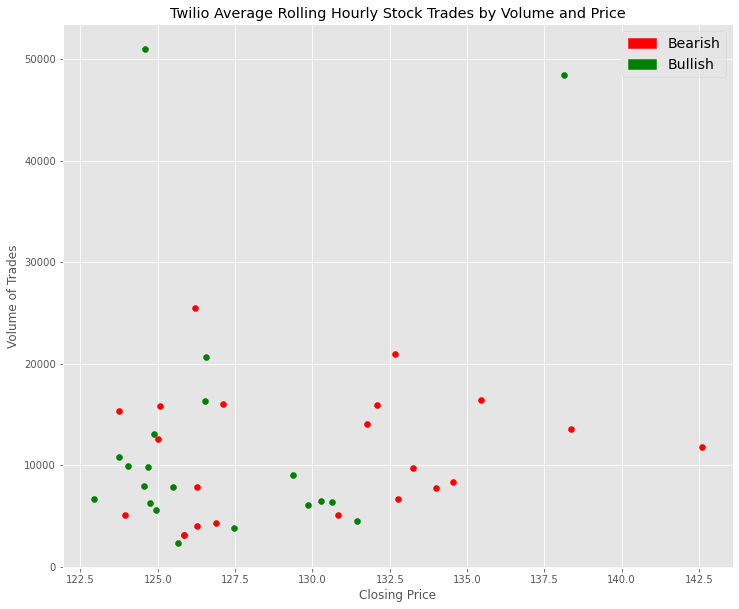

In [31]:
# Now you try!
# Enter your solution for Q12

# Plot aesthetics
plt.figure(figsize = (12,10))
plt.title("Twilio Average Rolling Hourly Stock Trades by Volume and Price")
plt.xlabel("Closing Price")
plt.ylabel("Volume of Trades")

# Legend definitions for plot
rpatch = mpatches.Patch(color = "r", label = "Bearish")
gpatch = mpatches.Patch(color = "g", label = "Bullish")

# Legend aesthetics
plt.legend(handles = [rpatch, gpatch], loc = 'best', fontsize = 14)

# Plot the bullish and bearish scatterplots...
plt.scatter(x = bullish['feature__60_min_rolling_close'], y = bullish['feature__60_min_rolling_volume'],
            color = 'g')
plt.scatter(x = bearish['feature__60_min_rolling_close'], y = bearish['feature__60_min_rolling_volume'],
            color = 'r')

plt.show()